# Interactive plotter

In this notebook we can show single plots for each data run. It requires `ipywidgets` and `ipyfilechooser`.

In [6]:
#!/usr/bin/env python3
from monitor.file_watcher import FileWatcher
from monitor.file_parser import FileParser
from monitor.plotter import Plotter
from monitor.plotting_functions import available_plots

p = Plotter(plots=available_plots, clean_up_interval=1800)
fp = FileParser(
    sampling = True,
    max_msgs = 10000,
    clean_up_interval = 1800
)

In [7]:
from ipyfilechooser import FileChooser
import ipywidgets as widgets

fc = FileChooser('/global/project/projectdirs/dune/www/data/Module0', select_desc='Select file')
fc.use_dir_icons = True
fc._show_dialog()

plot = widgets.Dropdown(
    options=available_plots,
    description='Choose plot:',
    disabled=False,
)
display(fc)
display(plot)

FileChooser(path='/global/project/projectdirs/dune/www/data/Module0', filename='', title='HTML(value='', layou…

Dropdown(description='Choose plot:', options=('FIFOFlags', 'PacketRate', 'PixelMap_1_1', 'PixelMap_1_2', 'Pixe…

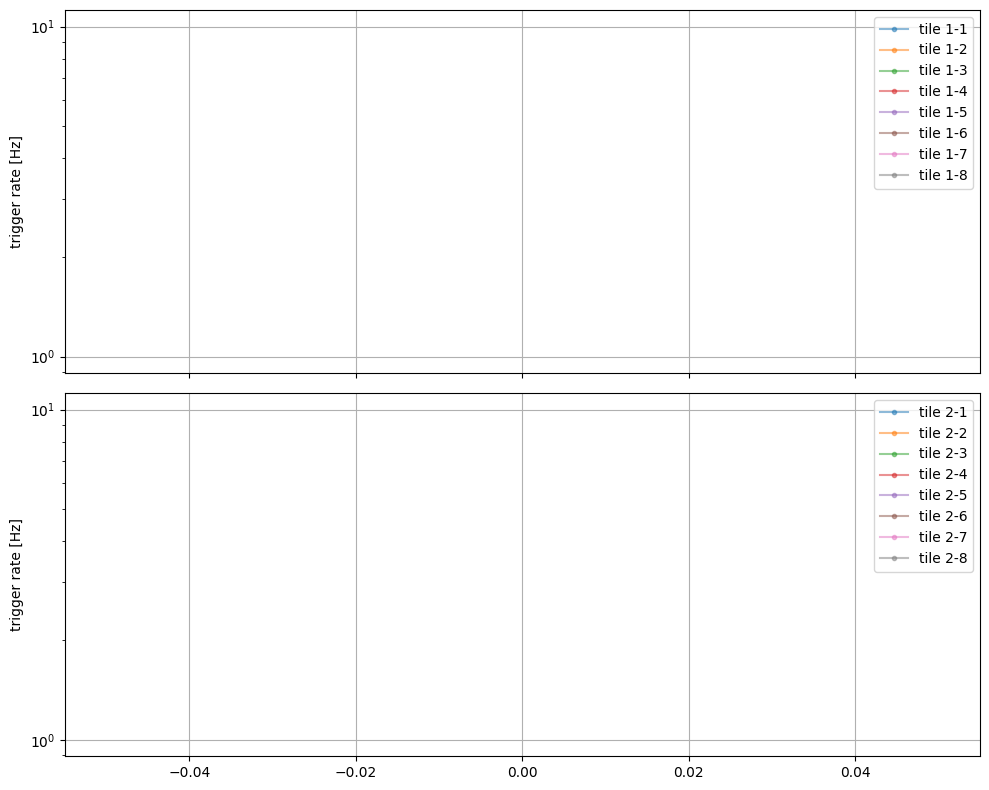

In [8]:
def plot_this():
    datafile_fh = fp([fc.selected])
    datafiles = [fc.selected]
    return p._plotters[plot.value](fc.selected,
                            datafile_fh[0])

try: 
    plot_this()
    fp.clean_up_temp_files([fc.selected])
except IndexError:
    print("Select a file")